# Solving the Radial Component of the Wave Equation of Hydrogen 

Schrodinger Equation of the H Atom:
$$
\frac{\partial}{\partial r}(r^2 \frac{\partial R}{\partial r})-\frac{2mr^2}{\hbar^2}(V(r)-E)R(r)=l(l+1)R(r)
$$
We convert this to a purely 2nd order ODE by defining $u(r)=rR(r)$
$$
\frac{\partial^2 u}{\partial r^2}=(-\frac{2m}{\hbar^2}(E+\frac{e^2}{4 \pi \epsilon_0 r})+\frac{l(l+1) }{r^2})*u(r)
$$
This is the equation we are trying to solve.  To use Numerov's Method, we will first separate the function needed to be multiplied by the original function to calculate the double derivative.  This is known as the 'Second_Derivative' function.
$$
f(r)=(-\frac{2m}{\hbar^2}(E+\frac{e^2}{4 \pi \epsilon_0 r})+\frac{l(l+1) }{r^2})
$$
This will become quite useful in our calculations. 

#### Pseudocode
1. Import necessary libraries and variables
2. Make function for second derivative, and twice-performed central difference
3. Define Numerov function.  The function will use equation 3 given above to find the value of the wavefunction given the two previous points.
4. Apply Numerov function to everything

In [1]:
from numpy import array,arange #required for certain calculations
from numpy import pi
import numpy as np

# Constants
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge   
a= 5.29177e-11     #Bohr radius
L = 50*a
L0=.00001*a
N = 10000     #number of points taken
eps_0 = 8.85419e-12
h = (L-L0)/N     #step size 
l=0

def Second_Derivative(E,x):
    return l*(l+1)/(x**2)+(-2*m/hbar**2)*(E+e**2/(4*pi*eps_0*x))


def Central_Difference(x):
    return Second_Derivative(x+h)-2*Second_Derivative(x)+Second_Derivative(x-h)

def phi(x):
    return psi(x)*(1-h**2*Second_Derivative(xpoints[x])/12)

def Numerov(E):
    #array for x points
    xpoints=np.linspace(L0,L,N)
    
    #array for psi values
    psi=np.zeros(N)
    psi[N-1]=0
    psi[N-2]=10**(-9)

    
    for i in range(N-2): #Numerov's Method
        psi[N-3-i]=(2*psi[N-i-2]-psi[N-i-1]+h**2*Second_Derivative(E,xpoints[N-i-2])*psi[N-i-2])/(1-h**2*Second_Derivative(E,xpoints[N-(i+2)])/12)
    return psi
    

def Efunc(E):
    target=e/1000
    E1=E-target
    E2=E+target
    psi1 = Numerov(E1)#determine wavefunction for initial energy
    psi2 = Numerov(E2)
    count=1
    while psi1[0]*psi2[0]>0: #if the difference in energies btwn E1 and E2 is larger than the granularity/uncertainty
        E2=E2+count*target
        count+=1
        psi2=Numerov(E2)
    psi=Numerov(E2)
    
    if l==1:
        psi=psi[100:]
    
    #normalized wavefunctions
    psi_norm=psi/sum(abs(psi))
    P=psi_norm**2/sum(psi_norm**2)
    print("E =",E2/e,"eV")
    return E2,psi_norm, P
    

In [255]:
#Now the goal is to calculate the energies, radial wavefunctions, and probabilities for all states up to 
#3s state

l=0
#n=1 state (1s state)
E_1s,psi_1s,P_1s=Efunc(-20*e)

#n=2 l=0 (2s state)
E_2s,psi_2s,P_2s=Efunc(-8*e)

#n=3 l=0 (2s state)
E_3s,psi_3s,P_3s=Efunc(-3.5*e)

l=1
#n=2 l=1 (2p state)
E_2p,psi_2p,P_2p=Efunc(-5*e)

#n=3 l=1 (3p state)
E_3p,psi_3p,P_3p=Efunc(-3*e)

E = -14.643 eV
E = -3.627999999999999 eV
E = -1.6079999999999997 eV
E = -3.4589999999999983 eV
E = -1.5679999999999994 eV


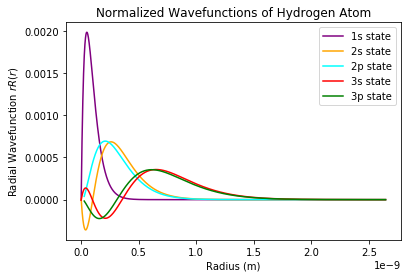

In [268]:
#Plotting wavefunctions

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import *

#xpoints=xpoints[100:]

plt.plot(xpoints, psi_1s, color='purple',label='1s state')
plt.plot(xpoints, psi_2s, color='orange',label='2s state')
plt.plot(xpoints[100:], psi_2p[100:], color='cyan',label='2p state')
plt.plot(xpoints, psi_3s, color='red',label='3s state')
plt.plot(xpoints[100:], psi_3p[100:], color='green',label='3p state')
plt.xlabel('Radius (m)')
plt.ylabel('Radial Wavefunction $r R(r)$')
plt.title('Normalized Wavefunctions of Hydrogen Atom')
plt.legend(loc='best')
plt.show()

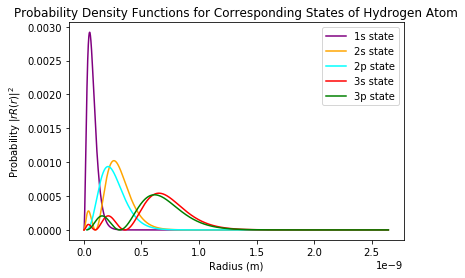

In [269]:
#Plotting Probabilities

plt.plot(xpoints, P_1s, color='purple',label='1s state')
plt.plot(xpoints, P_2s, color='orange',label='2s state')
plt.plot(xpoints[100:], P_2p[100:], color='cyan',label='2p state')
plt.plot(xpoints, P_3s, color='red',label='3s state')
plt.plot(xpoints[100:], P_3p[100:], color='green',label='3p state')
plt.xlabel('Radius (m)')
plt.ylabel('Probability $|rR(r)|^2$')
plt.title('Probability Density Functions for Corresponding States of Hydrogen Atom')
plt.legend(loc='best')
plt.show()